In [468]:
import numpy as np
import pandas as pd

In [469]:
df = pd.read_excel('data.xlsx')
df.head()

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7 777,14 918,2 825,2 009,1 841,сenter
1,Брянская область,4 560,10 211,1 538,1 418,837,NaN
2,Владимирская область,5 802,8 902,1 703,1 468,NaN,сenter
3,Воронежская область,NaN,17 186,3 362,2 458,4 347,сenter
4,Ивановская область,4 495,5 649,1 338,977,1 288,сenter


In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  85 non-null     object
 1   x1          83 non-null     object
 2   x2          84 non-null     object
 3   x3          84 non-null     object
 4   x4          84 non-null     object
 5   x5          83 non-null     object
 6   Округ       84 non-null     object
dtypes: object(7)
memory usage: 4.8+ KB


In [471]:
def clean_data(x):
    try:
        x = int(x)
    except:
        return -1
    return x

In [472]:
df[['x1', 'x2', 'x3', 'x4', 'x5']] = df[['x1', 'x2', 'x3', 'x4', 'x5']].applymap(lambda x: str(x).replace('\xa0', ''))
df.replace('nan', -1, inplace=True)
df[['x1', 'x2', 'x3', 'x4', 'x5']] = df[['x1', 'x2', 'x3', 'x4', 'x5']].astype('int64', errors='ignore')
df[['x1', 'x2', 'x3', 'x4', 'x5']] = df[['x1', 'x2', 'x3', 'x4', 'x5']].applymap(clean_data)
df.replace(-1, None, inplace=True)
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_16644\1715681380.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['x1', 'x2', 'x3', 'x4', 'x5']] = df[['x1', 'x2', 'x3', 'x4', 'x5']].applymap(lambda x: str(x).replace('\xa0', ''))
C:\Users\User\AppData\Local\Temp\ipykernel_16644\1715681380.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['x1', 'x2', 'x3', 'x4', 'x5']] = df[['x1', 'x2', 'x3', 'x4', 'x5']].applymap(clean_data)


,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777,14918,2825,2009,1841,сenter
1,Брянская область,4560,10211,1538,1418,837,NaN
2,Владимирская область,5802,8902,1703,1468,None,сenter
3,Воронежская область,None,17186,3362,2458,4347,сenter
4,Ивановская область,4495,5649,1338,977,1288,сenter


In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  85 non-null     object
 1   x1          83 non-null     object
 2   x2          84 non-null     object
 3   x3          84 non-null     object
 4   x4          83 non-null     object
 5   x5          83 non-null     object
 6   Округ       84 non-null     object
dtypes: object(7)
memory usage: 4.8+ KB


In [474]:
for name in ['x1', 'x2', 'x3', 'x4', 'x5']:
    df[name].fillna(df[name].mean(), inplace=True)

df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_16644\3676347755.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[name].fillna(df[name].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16644\3676347755.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[name].fillna(df[name].mean(), inplace=

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777.000000,14918.0,2825.0,2009.0,1841.000000,сenter
1,Брянская область,4560.000000,10211.0,1538.0,1418.0,837.000000,NaN
2,Владимирская область,5802.000000,8902.0,1703.0,1468.0,2169.903614,сenter
3,Воронежская область,7333.084337,17186.0,3362.0,2458.0,4347.000000,сenter
4,Ивановская область,4495.000000,5649.0,1338.0,977.0,1288.000000,сenter


In [475]:
df['Округ'].fillna(df['Округ'].value_counts().index[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16644\334959945.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Округ'].fillna(df['Округ'].value_counts().index[0], inplace=True)


In [476]:
df.isna().sum()

Unnamed: 0    0
x1            0
x2            0
x3            0
x4            0
x5            0
Округ         0
dtype: int64

<Axes: >

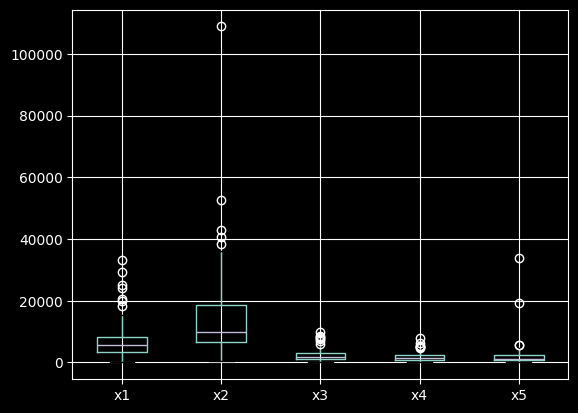

In [477]:
df.boxplot()

In [478]:
for name in ['x1', 'x2', 'x3', 'x4', 'x5']:
    q1 = df[name].quantile(0.25)  # первый квартиль
    q3 = df[name].quantile(0.75)  # третий квартиль
    median_value = df[name].median()
    df[name] = df[name].apply(lambda x: median_value if ((x < q1) or (x > q3)) else x)

In [479]:
df

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777.000000,14918.00,2825.0,2009.0,1841.000000,сenter
1,Брянская область,4560.000000,10211.00,1538.0,1418.0,837.000000,сenter
2,Владимирская область,5802.000000,8902.00,1703.0,1468.0,2169.903614,сenter
3,Воронежская область,7333.084337,17186.00,1801.0,1396.0,1194.000000,сenter
4,Ивановская область,4495.000000,9866.00,1338.0,977.0,1288.000000,сenter
...,...,...,...,...,...,...,...
80,Амурская область,5689.000000,7211.00,1801.0,977.0,829.000000,dv
81,Магаданская область,5689.000000,9866.00,1801.0,1396.0,1194.000000,dv
82,Сахалинская область,5689.000000,9866.00,1801.0,1396.0,1194.000000,dv
83,Еврейская автономная область,5689.000000,14787.75,1801.0,1396.0,1194.000000,dv


<Axes: >

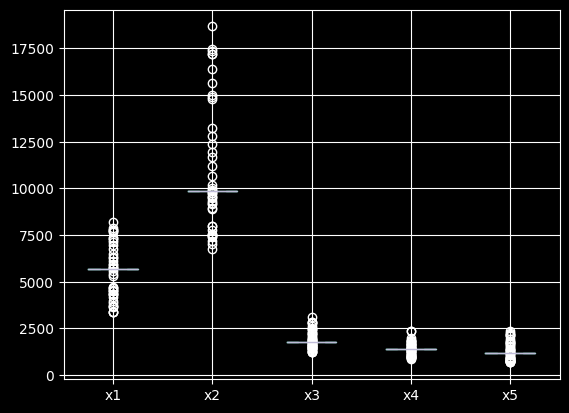

In [481]:
df.boxplot()